In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('sales_data_sample.csv')
df = data.copy()
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [3]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
col_drop=['ORDERNUMBER','CUSTOMERNAME', 'PHONE','ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 
          'CONTACTLASTNAME', 'CONTACTFIRSTNAME']
df.drop(columns=col_drop,inplace=True)
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,Ships,54,S72_3212,Spain,Small
2819,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,Ships,54,S72_3212,Finland,Medium
2820,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,Ships,54,S72_3212,Spain,Medium
2821,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,Ships,54,S72_3212,France,Small


In [6]:
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,S72_3212,Spain,Small
2819,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,S72_3212,Finland,Medium
2820,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,S72_3212,Spain,Medium
2821,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,S72_3212,France,Small


In [7]:
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   QUANTITYORDERED  2823 non-null   int64         
 1   PRICEEACH        2823 non-null   float64       
 2   ORDERLINENUMBER  2823 non-null   int64         
 3   SALES            2823 non-null   float64       
 4   ORDERDATE        2823 non-null   datetime64[ns]
 5   STATUS           2823 non-null   object        
 6   QTR_ID           2823 non-null   int64         
 7   MONTH_ID         2823 non-null   int64         
 8   YEAR_ID          2823 non-null   int64         
 9   PRODUCTLINE      2823 non-null   object        
 10  MSRP             2823 non-null   int64         
 11  PRODUCTCODE      2823 non-null   object        
 12  COUNTRY          2823 non-null   object        
 13  DEALSIZE         2823 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(

NoneType

In [8]:
df.columns


Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE',
       'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP',
       'PRODUCTCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encod_col=['PRODUCTCODE', 'COUNTRY', 'DEALSIZE','PRODUCTLINE','STATUS']
for i in encod_col:
    df[i] = encoder.fit_transform(df[i])
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,5,1,2,2003,1,95,0,18,2
1,34,81.35,5,2765.90,2003-05-07,5,2,5,2003,1,95,0,6,2
2,41,94.74,2,3884.34,2003-07-01,5,3,7,2003,1,95,0,6,1
3,45,83.26,6,3746.70,2003-08-25,5,3,8,2003,1,95,0,18,1
4,49,100.00,14,5205.27,2003-10-10,5,4,10,2003,1,95,0,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,5,4,12,2004,3,54,108,14,2
2819,29,100.00,1,3978.51,2005-01-31,5,1,1,2005,3,54,108,5,1
2820,43,100.00,4,5417.57,2005-03-01,4,1,3,2005,3,54,108,14,1
2821,34,62.24,1,2116.16,2005-03-28,5,1,3,2005,3,54,108,6,2


In [10]:
df.describe()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,6.466171,3553.889072,4.782501,2.717676,7.092455,2003.81509,2.515055,100.715551,53.773291,12.029401,1.398512
std,9.741443,20.174277,4.225841,1841.865106,0.879416,1.203878,3.656633,0.69967,2.411665,40.187912,31.585298,6.169774,0.592498
min,6.000000,26.880000,1.000000,482.130000,0.000000,1.000000,1.000000,2003.00000,0.000000,33.000000,0.000000,0.000000,0.000000
25%,27.000000,68.860000,3.000000,2203.430000,5.000000,2.000000,4.000000,2003.00000,0.000000,68.000000,27.000000,6.000000,1.000000
50%,35.000000,95.700000,6.000000,3184.800000,5.000000,3.000000,8.000000,2004.00000,2.000000,99.000000,53.000000,14.000000,1.000000
75%,43.000000,100.000000,9.000000,4508.000000,5.000000,4.000000,11.000000,2004.00000,5.000000,124.000000,81.000000,18.000000,2.000000
max,97.000000,100.000000,18.000000,14082.800000,5.000000,4.000000,12.000000,2005.00000,6.000000,214.000000,108.000000,18.000000,2.000000


In [11]:
df.drop(columns=['ORDERDATE'],inplace=True)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df)
df1

array([[-0.52289086,  0.5969775 , -1.05705871, ..., -1.70278009,
         0.96788903,  1.01535268],
       [-0.11220131, -0.11445035, -0.34701507, ..., -1.70278009,
        -0.97742149,  1.01535268],
       [ 0.60650538,  0.54938372, -1.05705871, ..., -1.70278009,
        -0.97742149, -0.672716  ],
       ...,
       [ 0.81185016,  0.81015797, -0.58369628, ...,  1.717138  ,
         0.31945219, -0.672716  ],
       [-0.11220131, -1.06186404, -1.29373992, ...,  1.717138  ,
        -0.97742149,  1.01535268],
       [ 1.2225397 , -0.89925195,  0.59970978, ...,  1.717138  ,
         0.96788903, -0.672716  ]])

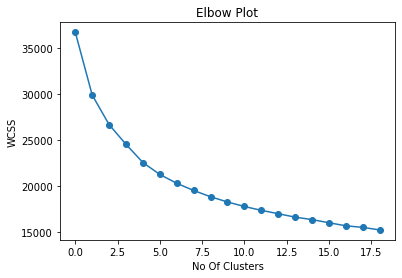

In [13]:
wcss=[] #within cluster sum of squares
from sklearn.cluster import KMeans
for i in range(1,20):
    model = KMeans(n_clusters=i)
    model.fit(df1)
    wcss.append(model.inertia_)
    
plt.plot(wcss, marker="o")
plt.title("Elbow Plot")
plt.ylabel("WCSS")
plt.xlabel("No Of Clusters")
plt.show()

In [18]:
model2= KMeans(n_clusters=5)
model2.fit(df1)


KMeans(n_clusters=5)

In [19]:
model2.labels_

array([0, 0, 1, ..., 0, 4, 3])

In [20]:
df['label'] = model2.labels_
df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE,label
0,30,95.70,2,2871.00,5,1,2,2003,1,95,0,18,2,0
1,34,81.35,5,2765.90,5,2,5,2003,1,95,0,6,2,0
2,41,94.74,2,3884.34,5,3,7,2003,1,95,0,6,1,1
3,45,83.26,6,3746.70,5,3,8,2003,1,95,0,18,1,1
4,49,100.00,14,5205.27,5,4,10,2003,1,95,0,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,5,4,12,2004,3,54,108,14,2,2
2819,29,100.00,1,3978.51,5,1,1,2005,3,54,108,5,1,0
2820,43,100.00,4,5417.57,4,1,3,2005,3,54,108,14,1,0
2821,34,62.24,1,2116.16,5,1,3,2005,3,54,108,6,2,4
